<a href="https://colab.research.google.com/github/allan-gadelha/projeto-dados-de-fato/blob/main/notebooks/initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lendo arquivo JSON

In [64]:
df = pd.read_json("../data/steamdb.json")

Iniciando o processo de EDA

In [65]:
df.head()

,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45


In [66]:
df.columns

Index(['sid', 'store_url', 'store_promo_url', 'store_uscore',
       'published_store', 'published_meta', 'published_stsp', 'published_hltb',
       'published_igdb', 'image', 'name', 'description', 'full_price',
       'current_price', 'discount', 'platforms', 'developers', 'publishers',
       'languages', 'voiceovers', 'categories', 'genres', 'tags',
       'achievements', 'gfq_url', 'gfq_difficulty', 'gfq_difficulty_comment',
       'gfq_rating', 'gfq_rating_comment', 'gfq_length', 'gfq_length_comment',
       'stsp_owners', 'stsp_mdntime', 'hltb_url', 'hltb_single',
       'hltb_complete', 'meta_url', 'meta_score', 'meta_uscore', 'grnk_score',
       'igdb_url', 'igdb_single', 'igdb_complete', 'igdb_score', 'igdb_uscore',
       'igdb_popularity'],
      dtype='object')

Tem algumas colunas que não vamos precisar, vou tirar elas inicialmente

In [67]:
df = df.drop(['store_promo_url', 'image'], axis=1)

Organizar para ficar mais fácil de ver a tabela

In [68]:
cols = ['name','languages', 'voiceovers', 'full_price', 'current_price'] + [col for col in df.columns if col not in ['languages', 'voiceovers', 'full_price', 'current_price']]

df = df[cols]

In [69]:
df.head(10)

,name,languages,voiceovers,full_price,current_price,sid,store_url,store_uscore,published_store,published_meta,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,Counter-Strike,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...",999.0,999.0,10,https://store.steampowered.com/app/10,97.0,2000-11-01,2000-11-08,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,Team Fortress Classic,"English,French,German,Italian,Spanish - Spain,...",None,499.0,499.0,20,https://store.steampowered.com/app/20,84.0,1999-04-01,1999-04-07,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,Day of Defeat,"English,French,German,Italian,Spanish - Spain",None,499.0,499.0,30,https://store.steampowered.com/app/30,90.0,2003-05-01,2003-05-06,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,Deathmatch Classic,"English,French,German,Italian,Spanish - Spain,...",None,499.0,499.0,40,https://store.steampowered.com/app/40,82.0,2001-06-01,2001-06-07,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,Half-Life: Opposing Force,"English,French,German,Korean",None,499.0,499.0,50,https://store.steampowered.com/app/50,95.0,1999-11-01,1999-10-31,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
5,Ricochet,"English,French,German,Italian,Spanish - Spain,...",None,499.0,499.0,60,https://store.steampowered.com/app/60,81.0,2000-11-01,2000-11-01,...,https://www.metacritic.com/game/pc/ricochet,NaN,68.0,NaN,https://www.igdb.com/games/ricochet,NaN,NaN,NaN,72.0,2.56
6,Half-Life,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...",999.0,999.0,70,https://store.steampowered.com/app/70,96.0,1998-11-08,1998-11-19,...,https://www.metacritic.com/game/pc/half-life?f...,96.0,90.0,NaN,https://www.igdb.com/games/half-life,12.0,15.0,80.0,90.0,14.82
7,Counter-Strike: Condition Zero,"English,French,German,Italian,Spanish - Spain,...",None,999.0,999.0,80,https://store.steampowered.com/app/80,90.0,2004-03-01,2004-01-03,...,https://www.metacritic.com/game/pc/counter-str...,65.0,87.0,NaN,https://www.igdb.com/games/counter-strike-cond...,NaN,NaN,66.0,75.0,4.12
8,Half-Life: Blue Shift,"English,French,German",None,499.0,499.0,130,https://store.steampowered.com/app/130,90.0,2001-06-01,2001-06-11,...,https://www.metacritic.com/game/pc/half-life-b...,71.0,82.0,NaN,https://www.igdb.com/games/half-life-blue-shift,4.0,2.0,60.0,72.0,3.67
9,Half-Life 2,"English,French,German,Italian,Korean,Spanish -...","English,French,German,Italian,Korean,Spanish -...",999.0,999.0,220,https://store.steampowered.com/app/220,97.0,2004-11-16,2004-11-16,...,https://www.metacritic.com/game/pc/half-life-2...,96.0,91.0,NaN,https://www.igdb.com/games/half-life-2,14.0,28.0,91.0,91.0,23.74


Criar outro dataframe apenas com os jogos que possuem idioma Português adicionado

In [70]:
df_portugues = df[df['languages'].str.contains('Portuguese', na=False)]

In [71]:
df_portugues.head()

,name,languages,voiceovers,full_price,current_price,sid,store_url,store_uscore,published_store,published_meta,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
9,Half-Life 2,"English,French,German,Italian,Korean,Spanish -...","English,French,German,Italian,Korean,Spanish -...",999.0,999.0,220,https://store.steampowered.com/app/220,97.0,2004-11-16,2004-11-16,...,https://www.metacritic.com/game/pc/half-life-2...,96.0,91.0,NaN,https://www.igdb.com/games/half-life-2,14.0,28.0,91.0,91.0,23.74
16,Half-Life 2: Episode One,"English,French,German,Italian,Korean,Spanish -...","English,French,German,Italian,Korean,Spanish -...",799.0,799.0,380,https://store.steampowered.com/app/380,95.0,2006-06-01,2006-06-01,...,https://www.metacritic.com/game/pc/half-life-2...,87.0,86.0,NaN,https://www.igdb.com/games/half-life-2-episode...,6.0,12.0,87.0,84.0,4.79
17,Portal,"English,French,German,Russian,Danish,Dutch,Fin...","English,French,German,Russian,Spanish - Spain,...",999.0,999.0,400,https://store.steampowered.com/app/400,98.0,2007-10-10,2007-10-10,...,https://www.metacritic.com/game/pc/portal?ftag...,90.0,92.0,NaN,https://www.igdb.com/games/portal,4.0,6.0,80.0,88.0,14.37
18,Half-Life 2: Episode Two,"English,French,German,Russian,Danish,Dutch,Fin...","English,French,German,Russian,Spanish - Spain",799.0,799.0,420,https://store.steampowered.com/app/420,96.0,2007-10-10,2007-10-10,...,https://www.metacritic.com/game/pc/half-life-2...,90.0,91.0,NaN,https://www.igdb.com/games/half-life-2-episode...,7.0,8.0,70.0,88.0,7.24
19,Team Fortress 2,"English,Danish,Dutch,Finnish,French,German,Ita...",English,NaN,NaN,440,https://store.steampowered.com/app/440,94.0,2007-10-10,2007-10-10,...,https://www.metacritic.com/game/pc/team-fortre...,92.0,91.0,NaN,https://www.igdb.com/games/team-fortress-2,NaN,NaN,80.0,83.0,5.90


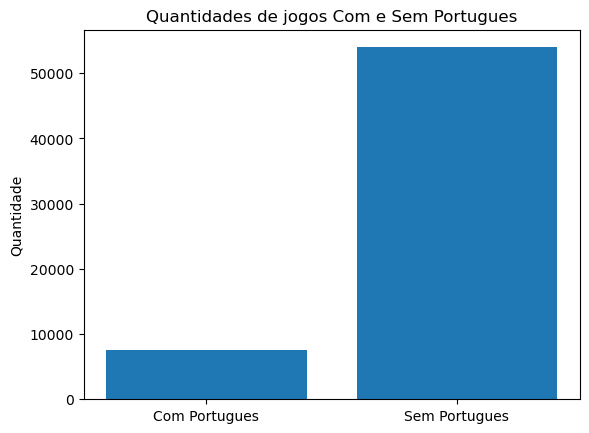

In [72]:
num_portuguese = df_portugues.shape[0]
num_total = df.shape[0]

plt.bar(['Com Portugues', 'Sem Portugues'], [num_portuguese, num_total])

plt.title('Quantidades de jogos Com e Sem Portugues')
plt.ylabel('Quantidade')

plt.show()